In [202]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections
from random import randrange

In [4]:
def propiedades_teoricas(n, k):    
    print("PROPIEDADES TEORICAS: ")
    print("Grado medio: ", 2*(n*k)/n)
    print("Numero de enlaces: ", (n*k))
    print("Camino mínimo: ", str(np.log(n) / np.log(np.log(n))))
    print("Coeficiente de clustering = ", str((np.log(n)**2) / n))
    print("")

In [56]:
#Erdos-Renyi

# n: número de nodos
# p: probabilidad de que dos nodos estén conectados
# it: número de vueltas del bucle

def generarRedER(n, p, it):
  
    #Inicializar arrays
    numEnlaces = []
    gradoMedio = []
    caminoMin = []
    numCompConex = []
    coefClustering = []
    
    for i in range(it):
        #Crear grafo
        g = nx.erdos_renyi_graph(n, p)
        
        #Número de enlaces
        ne = g.number_of_edges()
        numEnlaces.append(ne)
        
        #Grado medio
        gm = 2 * ne / n
        gradoMedio.append(gm)

        #Número de componentes conexas
        cc = nx.number_connected_components(g)
        numCompConex.append(cc)
        
        #Camino mínimo
        if(cc == 1):
            cm = nx.average_shortest_path_length(g)
            caminoMin.append(cm)
        else:
            caminoMin.append(None)

        #Clustering
        clustering = nx.average_clustering(g)
        coefClustering.append(clustering)
            
    tabla = pd.DataFrame(list(zip(numEnlaces, gradoMedio, numCompConex, caminoMin, coefClustering)), columns = ['Número enlaces', 'Grado medio', 'Componentes conexas', 'Camino mínimo', 'Clustering'])
    display(tabla)
    print("")
    
     #PROPIEDADES RED ORIGINAL
    
    print("PROPIEDADES RED ORIGINAL")
    print("Número de nodos = 166")
    print("Número de aristas = 1330")
    print("Grado medio = 16.02409638554217")
    print("Número de componentes conexas = 1.0")
    print("Camino mínimo medio = 1.7810149689667762")
    print("")
    print("")
    
    #PROPIEDADES
    
    print("PROPIEDADES RED ERDOS-RENYI p = " + str(p))
    
    #Número de nodos
    print("Número de nodos = " + str(n))
    
    #Número de aristas
    print("Número de aristas = " + str(sum(numEnlaces)/len(numEnlaces))) 
    
    #Grado medio
    print("Grado medio = " + str(sum(gradoMedio)/len(gradoMedio)))

    #Número de componentes conexas
    print("Número de componentes conexas = " + str(sum(numCompConex)/len(numCompConex)))
    
    #Camino mínimo
    suma = 0
    cont = 0
    
    for n in caminoMin:
        if n != None:
            suma += n
            cont += 1
        
    print("Camino mínimo medio = " + str(suma/cont))

    #Clustering
    print("Clustering medio = " + str(sum(coefClustering)/len(coefClustering)))
    
    #Fase
    if (p <= 0.20):
        print("FASE SUBCRÍTICA")
    elif (0.20 <p<= 0.50):
        print("FASE CRÍTICA")
    elif (0.50 < p <= 0.75):
        print("FASE SUPERCRÍTICA")
    else:
        print("FASE CONECTADA")
        
    print("")
    
    #DISTRIBUCIÓN DE GRADO
    
    distrib = []
    
    for nodo, deg in g.degree():
        distrib.append(deg)
        
    deg_cnt = collections.Counter(sorted(distrib))
    deg, cnt = zip(*deg_cnt.items())
    cnt = tuple([x for x in cnt])
    plt.figure(figsize=(8,6))
    plt.bar(deg, cnt, width=0.9)
    plt.plot(deg, cnt, marker='o', color='red', alpha=0.5)

    plt.title("Distribución de grado")
    plt.ylabel("Número de nodos")
    plt.xlabel("Grado")
    plt.show()
    
    
def representacionER(n, k, p, seed):
    figura = nx.erdos_renyi_graph(n, p)
    nx.draw_circular(figura, node_size=1, node_color='#cc0000', width=0.5)

,Número enlaces,Grado medio,Componentes conexas,Camino mínimo,Clustering
0,1330,16.024096,1,2.083899,0.092614
1,1318,15.879518,1,2.098357,0.091502
2,1344,16.192771,1,2.082074,0.090375
3,1393,16.783133,1,2.065790,0.094970
4,1332,16.048193,1,2.095363,0.103590
5,1308,15.759036,1,2.106024,0.093823
6,1353,16.301205,1,2.079518,0.090503
7,1290,15.542169,1,2.112961,0.092017
8,1283,15.457831,1,2.115152,0.092485
9,1389,16.734940,1,2.064257,0.104027



PROPIEDADES RED ORIGINAL
Número de nodos = 166
Número de aristas = 1330
Grado medio = 16.02409638554217
Número de componentes conexas = 1.0
Camino mínimo medio = 1.7810149689667762


PROPIEDADES RED ERDOS-RENYI p = 0.097
Número de nodos = 166
Número de aristas = 1327.16
Grado medio = 15.989879518072291
Número de componentes conexas = 1.0
Camino mínimo medio = 2.09574881343556
Clustering medio = 0.09679668951767549
FASE SUBCRÍTICA



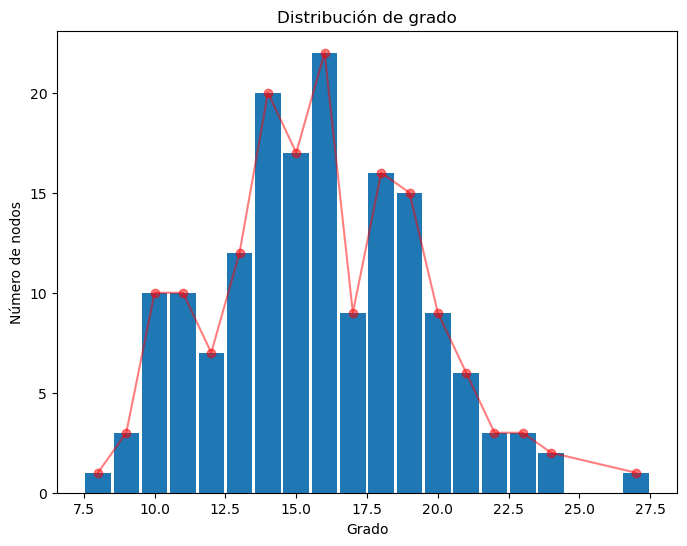

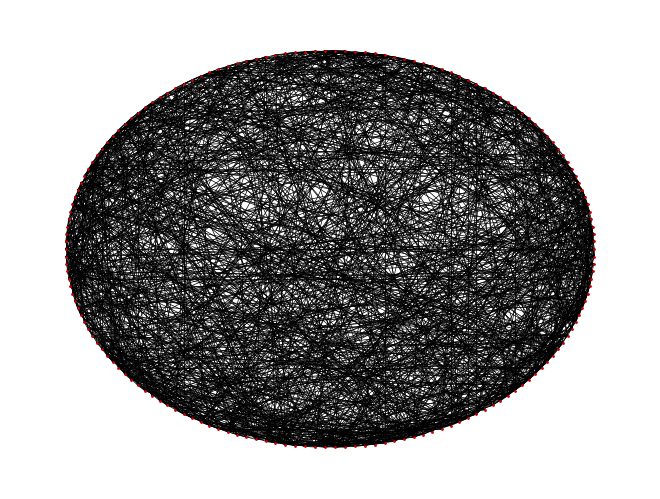

In [58]:
n = 166
p = 0.097
it = 50

generarRedER(n, p, it)
representacionER(n, k, p, 1)

In [63]:
#Barabási-Albert

# n: número de nodos
# m: grado
# it: número de vueltas del bucle

def generarRedBA(n, m, it):
  
    #Inicializar arrays
    numEnlaces = []
    gradoMedio = []
    caminoMin = []
    numCompConex = []
    coefClustering = []
    
    for i in range(it):
        #Crear grafo
        g = nx.barabasi_albert_graph(n, m)
        
        #Número de enlaces
        ne = g.number_of_edges()
        numEnlaces.append(ne)
        
        #Grado medio
        gm = 2 * ne / n
        gradoMedio.append(gm)

        #Número de componentes conexas
        cc = nx.number_connected_components(g)
        numCompConex.append(cc)
        
        #Camino mínimo
        if(cc == 1):
            cm = nx.average_shortest_path_length(g)
            caminoMin.append(cm)
        else:
            caminoMin.append(None)

        #Clustering
        clustering = nx.average_clustering(g)
        coefClustering.append(clustering)


    tabla = pd.DataFrame(list(zip(numEnlaces, gradoMedio, numCompConex, caminoMin, coefClustering)), columns = ['Número enlaces', 'Grado medio', 'Componentes conexas', 'Camino mínimo', 'Clustering'])
    display(tabla)
    print("")
    
    #PROPIEDADES RED ORIGINAL
    
    print("PROPIEDADES RED ORIGINAL")
    print("Número de nodos = 166")
    print("Número de aristas = 1330")
    print("Grado medio = 16.02409638554217")
    print("Número de componentes conexas = 1.0")
    print("Camino mínimo medio = 1.7810149689667762")
    print("")
    print("")
    
    #PROPIEDADES
    
    print("PROPIEDADES RED BARABASI-ALBERT m = " + str(m))
    
    #Número de nodos
    print("Número de nodos = " + str(n))
    
    #Número de aristas
    print("Número de aristas = " + str(sum(numEnlaces)/len(numEnlaces))) 
    
    #Grado medio
    print("Grado medio = " + str(sum(gradoMedio)/len(gradoMedio)))

    #Número de componentes conexas
    print("Número de componentes conexas = " + str(sum(numCompConex)/len(numCompConex)))
    
    #Camino mínimo
    suma = 0
    cont = 0
    
    for n in caminoMin:
        if n != None:
            suma += n
            cont += 1
        
    print("Camino mínimo medio = " + str(suma/cont))

    #Clustering
    print("Clustering medio = " + str(sum(coefClustering)/len(coefClustering)))
    print("")
    
    #DISTRIBUCIÓN DE GRADO
    
    distrib = []
    
    for nodo, deg in g.degree():
        distrib.append(deg)
        
    deg_cnt = collections.Counter(sorted(distrib))
    deg, cnt = zip(*deg_cnt.items())
    cnt = tuple([x for x in cnt])
    plt.figure(figsize=(8,6))
    plt.bar(deg, cnt, width=0.9)
    plt.plot(deg, cnt, marker='o', color='red', alpha=0.5)

    plt.title("Distribución de grado")
    plt.ylabel("Número de nodos")
    plt.xlabel("Grado")
    plt.show()
    
def representacionBA(n, m, p, seed):
    figura = nx.barabasi_albert_graph(n, m)
    nx.draw_circular(figura, node_size=1, node_color='#cc0000', width=0.5)

,Número enlaces,Grado medio,Componentes conexas,Camino mínimo,Clustering
0,1264,15.228916,1,2.107265,0.197064
1,1264,15.228916,1,2.121431,0.181784
2,1264,15.228916,1,2.098138,0.189999
3,1264,15.228916,1,2.127127,0.179495
4,1264,15.228916,1,2.098357,0.197506
5,1264,15.228916,1,2.121723,0.176927
6,1264,15.228916,1,2.120628,0.178210
7,1264,15.228916,1,2.121577,0.179472
8,1264,15.228916,1,2.120628,0.182965
9,1264,15.228916,1,2.118145,0.163821



PROPIEDADES RED ORIGINAL
Número de nodos = 166
Número de aristas = 1330
Grado medio = 16.02409638554217
Número de componentes conexas = 1.0
Camino mínimo medio = 1.7810149689667762


PROPIEDADES RED BARABASI-ALBERT m = 8
Número de nodos = 166
Número de aristas = 1264.0
Grado medio = 15.228915662650595
Número de componentes conexas = 1.0
Camino mínimo medio = 2.1172208835341366
Clustering medio = 0.18406513023465418



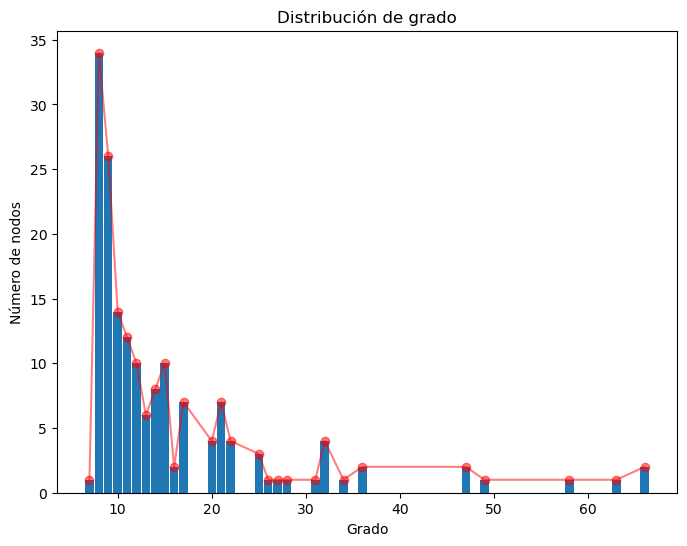

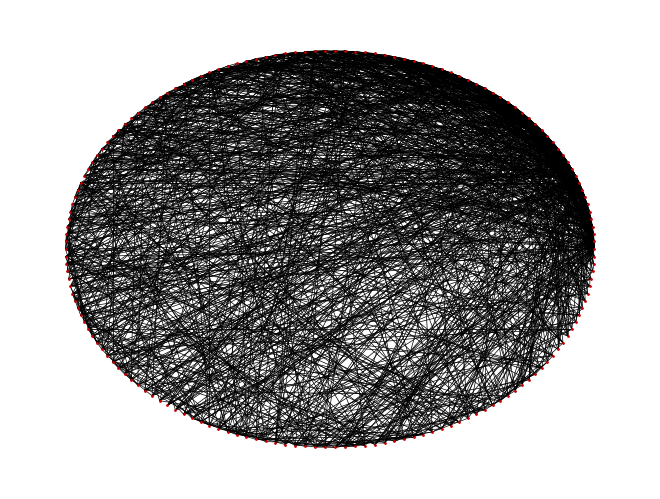

In [213]:
n = 166
m = 8
it = 50

generarRedBA(n, m, it)
representacionBA(n, m, p, 1)

In [164]:
#Watts-Strogatz

# n: número de nodos
# k: grado
# p: probabilidad de cambiar un enlace a otro nodo
# it: número de vueltas del bucle

def generarRedWS(n, k, p, it):

    #Inicializar arrays
    numEnlaces = []
    gradoMedio = []
    caminoMin = []
    numCompConex = []
    coefClustering = []
    configModel = []

    for i in range(it):
        #Crear grafo
        g = nx.watts_strogatz_graph(n, k, p, seed = i)
        
        #Número de enlaces
        ne = g.number_of_edges()
        numEnlaces.append(ne)
        
        #Grado medio
        gm = 2 * ne / n
        gradoMedio.append(gm)

        #Número de componentes conexas
        cc = nx.number_connected_components(g)
        numCompConex.append(cc)
        
        #Camino mínimo
        if(cc == 1):
            cm = nx.average_shortest_path_length(g)
            caminoMin.append(cm)
        else:
            caminoMin.append(None)

        #Clustering
        clustering = nx.average_clustering(g)
        coefClustering.append(clustering)
        
    tabla = pd.DataFrame(list(zip(numEnlaces, gradoMedio, numCompConex, caminoMin, coefClustering)), columns = ['Número enlaces', 'Grado medio', 'Componentes conexas', 'Camino mínimo', 'Clustering'])
    display(tabla)
    print("")
    
    #PROPIEDADES RED ORIGINAL
    
    print("PROPIEDADES RED ORIGINAL")
    print("Número de nodos = 166")
    print("Número de aristas = 1330")
    print("Grado medio = 16.02409638554217")
    print("Número de componentes conexas = 1.0")
    print("Camino mínimo medio = 1.7810149689667762")
    print("")
    print("")
    
    #PROPIEDADES
    
    print("PROPIEDADES RED WATTS-STROGATZ p = " + str(p))
    
    #Número de nodos
    print("Número de nodos = " + str(n))
    
    #Número de aristas
    print("Número de aristas = " + str(sum(numEnlaces)/len(numEnlaces))) 
    
    #Grado medio
    print("Grado medio = " + str(sum(gradoMedio)/len(gradoMedio)))

    #Número de componentes conexas
    print("Número de componentes conexas = " + str(sum(numCompConex)/len(numCompConex)))
    
    #Camino mínimo
    suma = 0
    cont = 0
    
    for n in caminoMin:
        if n != None:
            suma += n
            cont += 1
        
    print("Camino mínimo medio = " + str(suma/cont))

    #Clustering
    print("Clustering medio = " + str(sum(coefClustering)/len(coefClustering)))
    print("")
    
    #DISTRIBUCIÓN DE GRADO
    
    distrib = []
    
    for nodo, deg in g.degree():
        distrib.append(deg)
        
    deg_cnt = collections.Counter(sorted(distrib))
    deg, cnt = zip(*deg_cnt.items())
    cnt = tuple([x for x in cnt])
    plt.figure(figsize=(8,6))
    plt.bar(deg, cnt, width=0.9)
    plt.plot(deg, cnt, marker='o', color='red', alpha=0.5)

    plt.title("Distribución de grado")
    plt.ylabel("Número de nodos")
    plt.xlabel("Grado")
    plt.show()
    
def representacionWS(n, k, p, seed):
    figura = nx.watts_strogatz_graph(n, k, p, seed)
    nx.draw_circular(figura, node_size=1, node_color='#cc0000', width=0.5)

,Número enlaces,Grado medio,Componentes conexas,Camino mínimo,Clustering
0,1328,16.0,1,2.087842,0.094944
1,1328,16.0,1,2.091712,0.092394
2,1328,16.0,1,2.088792,0.084264
3,1328,16.0,1,2.083023,0.086321
4,1328,16.0,1,2.088938,0.092372
5,1328,16.0,1,2.085360,0.092064
6,1328,16.0,1,2.088426,0.091067
7,1328,16.0,1,2.085360,0.087765
8,1328,16.0,1,2.082804,0.093860
9,1328,16.0,1,2.087623,0.089947



PROPIEDADES RED ORIGINAL
Número de nodos = 166
Número de aristas = 1330
Grado medio = 16.02409638554217
Número de componentes conexas = 1.0
Camino mínimo medio = 1.7810149689667762


PROPIEDADES RED WATTS-STROGATZ p = 1
Número de nodos = 166
Número de aristas = 1328.0
Grado medio = 16.0
Número de componentes conexas = 1.0
Camino mínimo medio = 2.087544359255203
Clustering medio = 0.09151307222717317

[10, 14, 17, 13, 15, 19, 18, 14, 21, 16, 10, 15, 13, 14, 15, 18, 14, 17, 13, 18, 18, 13, 16, 13, 23, 12, 13, 21, 16, 19, 12, 16, 14, 18, 20, 14, 15, 14, 17, 16, 15, 16, 18, 18, 18, 16, 15, 13, 17, 13, 13, 18, 16, 16, 20, 11, 18, 14, 19, 18, 18, 17, 19, 17, 17, 15, 11, 20, 17, 16, 16, 11, 15, 20, 20, 15, 13, 22, 17, 17, 18, 10, 14, 13, 17, 17, 20, 17, 15, 17, 15, 14, 24, 15, 14, 20, 19, 15, 15, 16, 17, 15, 19, 14, 15, 16, 12, 17, 16, 19, 20, 22, 12, 13, 12, 16, 16, 14, 20, 16, 14, 15, 17, 20, 15, 12, 14, 17, 13, 18, 19, 10, 16, 13, 14, 14, 18, 15, 20, 17, 20, 13, 17, 17, 20, 15, 16, 13, 12

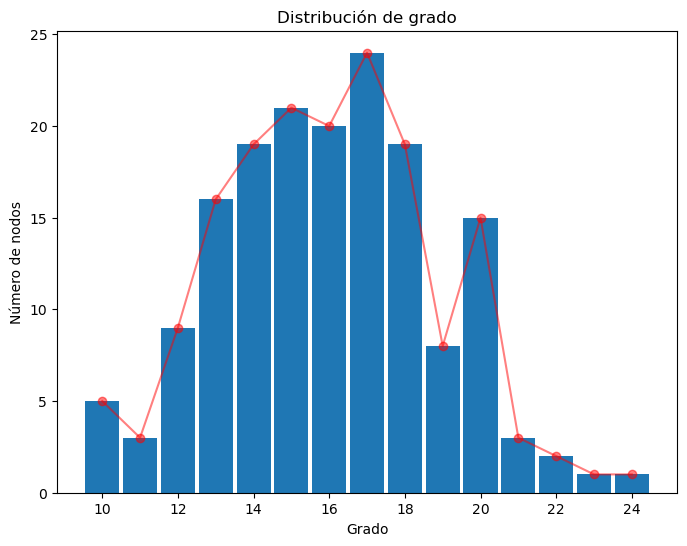

PROPIEDADES TEORICAS: 
Grado medio:  32.0
Numero de enlaces:  2656
Camino mínimo:  3.133135791569057
Coeficiente de clustering =  0.1574242117367857



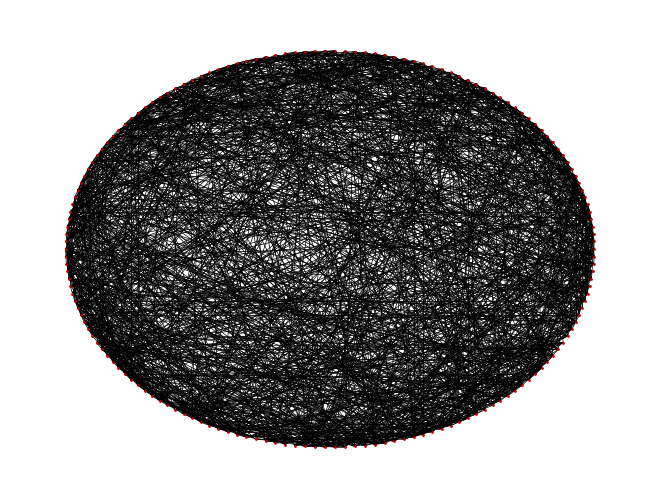

In [165]:
n = 166
k = 16
p = 1
it = 50

generarRedWS(n, k, p, it)
propiedades_teoricas(n, k)
representacionWS(n, k, p, 1)

In [210]:
#Configuration model

# n: número de nodos
# k: grado
# p: probabilidad de cambiar un enlace a otro nodo
# it: número de vueltas del bucle

def generarRedCM(n, k, p, it):
    
    configModel = []
    restantes = n//2
    grado = 1
    
    while (restantes > 1):
        
        for i in range(restantes):
            configModel.append(grado)
        
        restantes = restantes//2
        print(restantes)
        grado = grado * 2
    
    for i in range(5):
        configModel.append(random.randint(0, 64))
    
    print(configModel)
    print(len(configModel))
    
    #Inicializar arrays
    numEnlaces = []
    gradoMedio = []
    caminoMin = []
    numCompConex = []
    coefClustering = []
    configModel = []

    for i in range(it):
        #Crear grafo
        g = nx.configuration_model(configModel, None, 1)
        
        #Número de enlaces
        ne = g.number_of_edges()
        numEnlaces.append(ne)
        
        #Grado medio
        gm = 2 * ne / n
        gradoMedio.append(gm)

        #Número de componentes conexas
        cc = nx.number_connected_components(g)
        numCompConex.append(cc)
        
        #Camino mínimo
        if(cc == 1):
            cm = nx.average_shortest_path_length(g)
            caminoMin.append(cm)
        else:
            caminoMin.append(None)
        
    tabla = pd.DataFrame(list(zip(numEnlaces, gradoMedio, numCompConex, caminoMin, coefClustering)), columns = ['Número enlaces', 'Grado medio', 'Componentes conexas', 'Camino mínimo', 'Clustering'])
    display(tabla)
    print("")
    
    #PROPIEDADES RED ORIGINAL
    
    print("PROPIEDADES RED ORIGINAL")
    print("Número de nodos = 166")
    print("Número de aristas = 1330")
    print("Grado medio = 16.02409638554217")
    print("Número de componentes conexas = 1.0")
    print("Camino mínimo medio = 1.7810149689667762")
    print("")
    print("")
    
    #PROPIEDADES
    
    print("PROPIEDADES RED CONFIGURATION MODEL")
    
    #Número de nodos
    print("Número de nodos = " + str(n))
    
    #Número de aristas
    print("Número de aristas = " + str(sum(numEnlaces)/len(numEnlaces))) 
    
    #Grado medio
    print("Grado medio = " + str(sum(gradoMedio)/len(gradoMedio)))

    #Número de componentes conexas
    print("Número de componentes conexas = " + str(sum(numCompConex)/len(numCompConex)))
    
    #DISTRIBUCIÓN DE GRADO
    
    distrib = []
    
    for nodo, deg in g.degree():
        distrib.append(deg)
        
    deg_cnt = collections.Counter(sorted(distrib))
    deg, cnt = zip(*deg_cnt.items())
    cnt = tuple([x for x in cnt])
    plt.figure(figsize=(8,6))
    plt.bar(deg, cnt, width=0.9)
    plt.plot(deg, cnt, marker='o', color='red', alpha=0.5)

    plt.title("Distribución de grado")
    plt.ylabel("Número de nodos")
    plt.xlabel("Grado")
    plt.show()
    
    

In [211]:
n = 166
k = 16
p = 1
it = 50

generarRedCM(n, k, p, it)

41
20
10
5
2
1
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 16, 16, 16, 16, 32, 32, 29, 2, 52, 17, 37]
166


,Número enlaces,Grado medio,Componentes conexas,Camino mínimo,Clustering



PROPIEDADES RED ORIGINAL
Número de nodos = 166
Número de aristas = 1330
Grado medio = 16.02409638554217
Número de componentes conexas = 1.0
Camino mínimo medio = 1.7810149689667762


PROPIEDADES RED CONFIGURATION MODEL
Número de nodos = 166
Número de aristas = 0.0
Grado medio = 0.0
Número de componentes conexas = 0.0


ValueError: not enough values to unpack (expected 2, got 0)